## **Data source**: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **(Target)** **HeartDisease**: output class [1: heart disease, 0: Normal]




In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


there is 5 columns as categorical that we need to encoding

In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart.duplicated().sum()

0

In [ ]:
#Summarize the data to see the distribution of data
print(heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [ ]:
#encoding categorical columns
encoder = LabelEncoder()
heart['Sex'] = encoder.fit_transform(heart['Sex'])
Sex = {index : label for index, label in enumerate(encoder.classes_)}
Sex

{0: 'F', 1: 'M'}

In [ ]:
heart['ChestPainType'] = encoder.fit_transform(heart['ChestPainType'])
ChestPainType = {index : label for index, label in enumerate(encoder.classes_)}
ChestPainType

{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}

In [ ]:
heart['RestingECG'] = encoder.fit_transform(heart['RestingECG'])
RestingECG = {index : label for index, label in enumerate(encoder.classes_)}
RestingECG

{0: 'LVH', 1: 'Normal', 2: 'ST'}

In [ ]:
heart['ExerciseAngina'] = encoder.fit_transform(heart['ExerciseAngina'])
ExerciseAngina = {index : label for index, label in enumerate(encoder.classes_)}
ExerciseAngina

{0: 'N', 1: 'Y'}

In [ ]:
heart['ST_Slope'] = encoder.fit_transform(heart['ST_Slope'])
ST_Slope = {index : label for index, label in enumerate(encoder.classes_)}
ST_Slope

{0: 'Down', 1: 'Flat', 2: 'Up'}

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# **Linear Regression**

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = heart.drop(columns='HeartDisease')
target = heart[['HeartDisease']]

feature_heart_train, feature_heart_test, target_heart_train, target_heart_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_heart_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Age,1.376627
2,Sex,1.124955
3,ChestPainType,1.207361
4,RestingBP,1.129032
5,Cholesterol,1.234617
6,FastingBS,1.153860
7,RestingECG,1.081700
8,MaxHR,1.536364
9,ExerciseAngina,1.555907
10,Oldpeak,1.507055


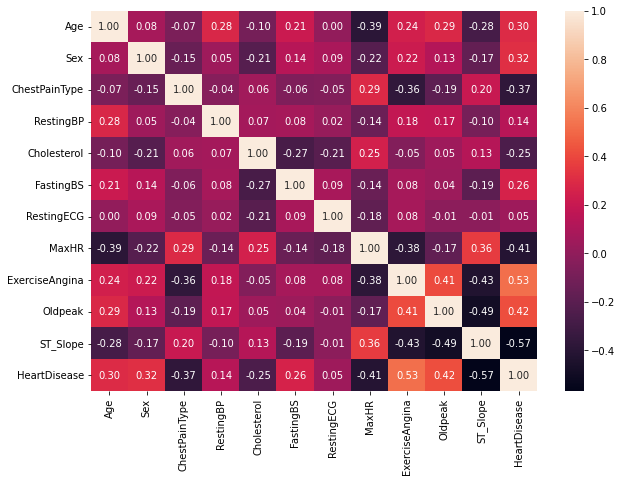

In [ ]:
# heatmap correlation, multicolinearity check
heart_train = pd.concat([feature_heart_train, target_heart_train], axis=1)
corr = heart_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

There is no feature to drop

# **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_heart_train = feature_heart_train.to_numpy()
y_heart_train = target_heart_train.to_numpy()

multi_reg.fit(X_heart_train, y_heart_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_heart_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,0.830489
1,Age,0.002086
2,Sex,0.148769
3,ChestPainType,-0.079928
4,RestingBP,0.000515
5,Cholesterol,-0.000607
6,FastingBS,0.121795
7,RestingECG,-0.031777
8,MaxHR,-0.001563
9,ExerciseAngina,0.216609


**Training Error**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_predict_train = multi_reg.predict(X_heart_train)
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_heart_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_heart_train))))

R-squared for training data is 0.10725867101552433
RMSE for training data is 0.34191285613582534


In [ ]:
# prepare prediction result on test data
X_heart_test = feature_heart_test.to_numpy()
y_predict_test = multi_reg.predict(X_heart_test)

# ground truth target
y_heart_test = target_heart_test.to_numpy()

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_heart_test, y_heart_test))))

RMSE for testing data is 0.0


# **1.Split data: train-validation-test**

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = heart.drop(columns='HeartDisease')
target = heart[['HeartDisease']]

feature_heart_pretrain, feature_heart_test, target_heart_pretrain, target_heart_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_heart_train, feature_heart_validation, target_heart_train, target_heart_validation = train_test_split(feature_heart_pretrain, target_heart_pretrain, test_size=0.20, random_state=42)

# **2.Multicollinearity Checking**

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_heart_train)

vif_heart = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_heart.columns = ['feature','vif_score']
vif_heart = vif_heart.loc[vif_heart.feature!='const']
vif_heart

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Age,1.390652
2,Sex,1.124579
3,ChestPainType,1.217504
4,RestingBP,1.141081
5,Cholesterol,1.260908
6,FastingBS,1.139309
7,RestingECG,1.100275
8,MaxHR,1.557288
9,ExerciseAngina,1.555851
10,Oldpeak,1.509899


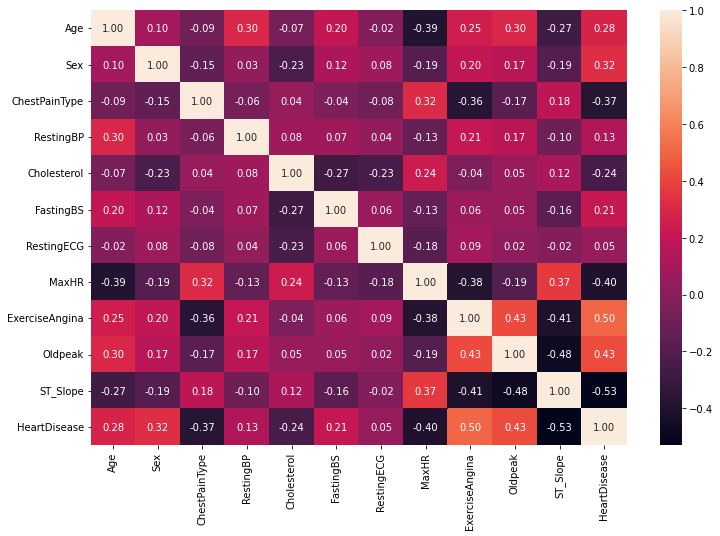

In [ ]:
# heatmap correlation
heart_train = pd.concat([feature_heart_train, target_heart_train], axis=1)
corr = heart_train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

#**3**. **Train Multiple Models**
**with different alpha (lambda)=[0,01,0.1,1, 10]**

**a.Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_heart_train = feature_heart_train.to_numpy()
y_heart_train = target_heart_train.to_numpy()
y_heart_train = y_heart_train.reshape(len(y_heart_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_heart_train, y_heart_train)
ridge_reg_pointone.fit(X_heart_train, y_heart_train)
ridge_reg_one.fit(X_heart_train, y_heart_train)
ridge_reg_ten.fit(X_heart_train, y_heart_train)

Ridge(alpha=10, random_state=42)

**Find the best model (alpha)**
**Based on validation set**

In [ ]:
from sklearn.metrics import mean_squared_error

X_heart_validation = feature_heart_validation.to_numpy()
y_heart_validation = target_heart_validation.to_numpy()
y_heart_validation = y_heart_validation.reshape(len(y_heart_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_heart_validation)
    rmse = np.sqrt(mean_squared_error(y_heart_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.30152043173317583
RMSE of Ridge regression model with alpha = 0.1 is 0.30154036216288604
RMSE of Ridge regression model with alpha = 1.0 is 0.3017403711341133
RMSE of Ridge regression model with alpha = 10 is 0.3037865069479636


*Best Lamda is 0.01 when RSME Smallest (0.3015)*

**Coefficient Tour (Ridge)**

In [ ]:
model = ridge_reg_pointzeroone# 0.01

coef_heart = pd.DataFrame({
    'feature':['intercept'] + feature_heart_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_heart

,feature,coefficient
0,intercept,0.858526
1,Age,0.001815
2,Sex,0.155823
3,ChestPainType,-0.091542
4,RestingBP,0.000257
5,Cholesterol,-0.000687
6,FastingBS,0.090021
7,RestingECG,-0.046744
8,MaxHR,-0.001406
9,ExerciseAngina,0.207746


# **5. Model Evaluation**

**Ridge Reg.**

In [ ]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_heart_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,0.858526
1,Age,0.001815
2,Sex,0.155823
3,ChestPainType,-0.091542
4,RestingBP,0.000257
5,Cholesterol,-0.000687
6,FastingBS,0.090021
7,RestingECG,-0.046744
8,MaxHR,-0.001406
9,ExerciseAngina,0.207746


***Diagnostic Study - Ridge***

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_heart_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_heart_train)))

R-squared for training data is -0.008755057228725605


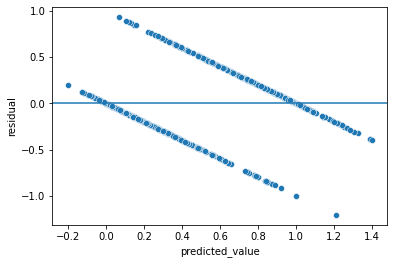

In [ ]:
# calculate residuals
residual = y_heart_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
heart_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=heart_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

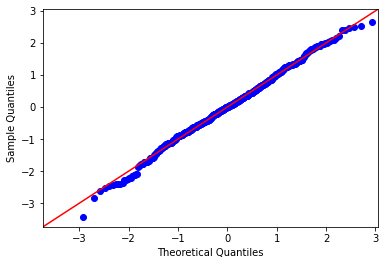

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Training Error-Ridge**

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_heart_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_heart_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_heart_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_heart_train)))

RMSE for training data is 0.35276102954064065
MAE for training data is 0.2770935239826217
MAPE for training data is 0.7905736943395827


**Testing Error-Ridge**

In [ ]:
# prepare prediction result on test data
X_heart_test = feature_heart_test.to_numpy()
y_predict_test = ridge_best.predict(X_heart_test)

# ground truth target
y_heart_test = target_heart_test.to_numpy()
y_heart_test = y_heart_test.reshape(len(y_heart_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_heart_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_heart_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_heart_test)))

RMSE for testing data is 0.37142435253450645
MAE for testing data is 0.29736129081513873
MAPE for testing data is 0.9035511141406779


# **Decision Tree**

In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
DT = DecisionTreeRegressor(max_depth = 2)
DT.fit(X_heart_train,y_heart_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
DT_params = {'max_depth': range(1,11)}
DT_grid_search = GridSearchCV(estimator = DT, param_grid = DT_params, cv=10,return_train_score = True )
DT_grid_search.fit(X_heart_train, y_heart_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=2),
             param_grid={'max_depth': range(1, 11)}, return_train_score=True)

In [ ]:
DT_cv_results = pd.DataFrame(DT_grid_search.cv_results_)
DT_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001266,0.000912,0.001420,0.001793,1,{'max_depth': 1},0.370890,0.347403,0.265749,0.504857,...,0.368231,0.343860,0.352924,0.356247,0.370669,0.362826,0.367083,0.361019,0.360281,0.007550
1,0.001546,0.001162,0.000571,0.000033,2,{'max_depth': 2},0.347177,0.361797,0.429963,0.570737,...,0.460834,0.451525,0.466148,0.459663,0.481296,0.460084,0.462773,0.472334,0.465253,0.007809
2,0.002230,0.002314,0.000800,0.000404,3,{'max_depth': 3},0.484952,0.388833,0.496240,0.568484,...,0.536835,0.528127,0.542571,0.542272,0.552450,0.533833,0.536038,0.554313,0.541691,0.008442
3,0.003020,0.002725,0.001707,0.002191,4,{'max_depth': 4},0.549465,0.260994,0.443482,0.360597,...,0.601125,0.616942,0.600911,0.602587,0.614034,0.602458,0.603582,0.624459,0.608926,0.007631
4,0.002572,0.002121,0.000580,0.000042,5,{'max_depth': 5},0.514929,0.223310,0.399425,0.303132,...,0.666545,0.682292,0.671713,0.675397,0.681649,0.661368,0.671782,0.690204,0.675443,0.007841
5,0.002933,0.002096,0.001121,0.001585,6,{'max_depth': 6},0.447936,0.283490,0.430082,0.322627,...,0.743016,0.746855,0.749424,0.757735,0.757677,0.735582,0.757847,0.769233,0.752059,0.008967
6,0.003347,0.003263,0.000644,0.000126,7,{'max_depth': 7},0.215173,0.233597,0.654477,0.248670,...,0.828345,0.788887,0.825539,0.814231,0.832427,0.829176,0.839799,0.830265,0.823219,0.014833
7,0.002372,0.000059,0.000607,0.000032,8,{'max_depth': 8},0.190893,0.081506,0.439281,0.251709,...,0.909122,0.841005,0.902587,0.884849,0.880681,0.897897,0.910050,0.872273,0.884993,0.020033
8,0.002467,0.000077,0.000597,0.000037,9,{'max_depth': 9},0.299377,0.025988,0.348880,0.225260,...,0.957638,0.904450,0.951953,0.936930,0.935731,0.955898,0.945755,0.934085,0.939062,0.014611
9,0.002752,0.000830,0.000608,0.000036,10,{'max_depth': 10},0.016667,0.101039,0.342485,0.144529,...,0.984371,0.951313,0.981448,0.967324,0.952947,0.974940,0.971251,0.968873,0.969799,0.010319


In [ ]:
DT_cv_results[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'max_depth': 1},0.360281,0.354213
1,{'max_depth': 2},0.465253,0.411571
2,{'max_depth': 3},0.541691,0.455132
3,{'max_depth': 4},0.608926,0.407805
4,{'max_depth': 5},0.675443,0.329186
5,{'max_depth': 6},0.752059,0.272956
6,{'max_depth': 7},0.823219,0.233983
7,{'max_depth': 8},0.884993,0.141632
8,{'max_depth': 9},0.939062,0.035527
9,{'max_depth': 10},0.969799,0.064161


Text(0, 0.5, 'Accuracy')

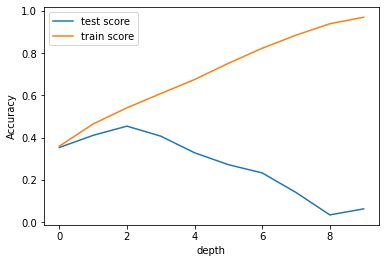

In [ ]:
plt.plot(DT_grid_search.cv_results_['mean_test_score'],)
plt.plot(DT_grid_search.cv_results_['mean_train_score'])
plt.legend(['test score', 'train score'], loc='upper left')
plt.xlabel('depth')
plt.ylabel('Accuracy')

In [ ]:
DT = DT_grid_search.best_estimator_
DT

DecisionTreeRegressor(max_depth=3)

In [ ]:
DT_cv_score = DT_grid_search.best_score_
DT_cv_score

0.4551324330405587

In [ ]:
DT.fit(X_heart_train,y_heart_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
DT_predictions = DT.predict(X_heart_test)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_heart_train, y_heart_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
DT_RMSE = np.sqrt(mean_squared_error(y_heart_test, DT_predictions))

In [ ]:
DT_eval = pd.DataFrame({'Model': 'Decision Tree','RMSE':[DT_RMSE],'CV Score':[np.mean(DT_cv_score)]})
print('Model evaluation')
DT_eval

Model evaluation


,Model,RMSE,CV Score
0,Decision Tree,0.335478,0.455132


In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_heart_train, y = y_heart_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_heart_train)
r2_score_rf_train = r2_score(y_heart_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_heart_test)
r2_score_rf_test = r2_score(y_heart_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_heart_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.4799569803139203
R2_score (train):  0.9288038145363409
R2_score (test):  0.5944076319941741
RMSE:  0.31416971320554143


In [ ]:
RF = RandomForestRegressor(n_estimators = 30) 

In [ ]:
RF_params = {'max_depth': range(2, 10), 'min_samples_split': [2, 4, 6, 8, 10],'n_estimators': range(1, 50) }
RF_grid_search = GridSearchCV(estimator = RF, param_grid = RF_params, cv=10,return_train_score = True )
RF_grid_search.fit(X_heart_train, y_heart_train)

KeyboardInterrupt: ignored

In [ ]:
RF_cv_results = pd.DataFrame(RF_grid_search.cv_results_)
RF_cv_results.columns

In [ ]:
RF_cv_results[['params','param_n_estimators','mean_train_score','mean_test_score']]